# Importing the necessary libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data set

Download the data set from: https://www.kaggle.com/gilsousa/habermans-survival-data-set

In [3]:
haberman = pd.read_csv("haberman.csv")

In [4]:
print(haberman.shape)

(306, 4)


In [5]:
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [ ]:
'''Number of Attributes/Features: 4 (including the class attribute)

Attribute/Features Information:

Age of patient at time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year'''

To read about $\textbf{axillary lymph nodes}$ follow the link : https://en.wikipedia.org/wiki/Axillary_lymph_nodes

In [8]:
haberman["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

# 2-D Scatter Plot

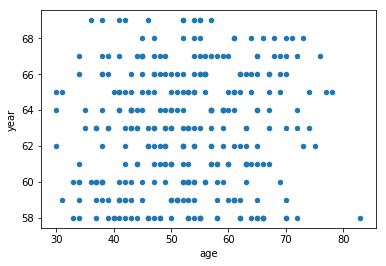

In [6]:
haberman.plot(kind='scatter', x='age', y='year')
plt.show()

## Observations

- We cannot make any good insights from the single coloured points plotted between 'age' & 'year'.
- We should colour out each status with a different colour.

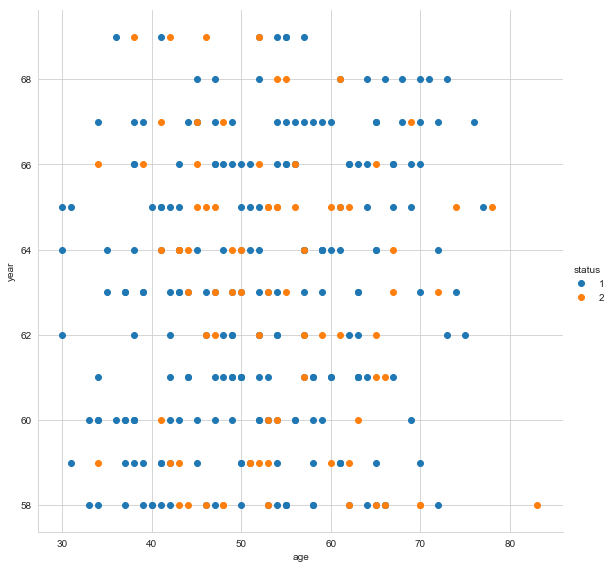

In [13]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=8) \
   .map(plt.scatter, "age", "year") \
   .add_legend()
plt.show()

## Observations

- We cannot classify the two classes as they both are quite jumbled up.
- We should come up with other plots between the various features in the set.